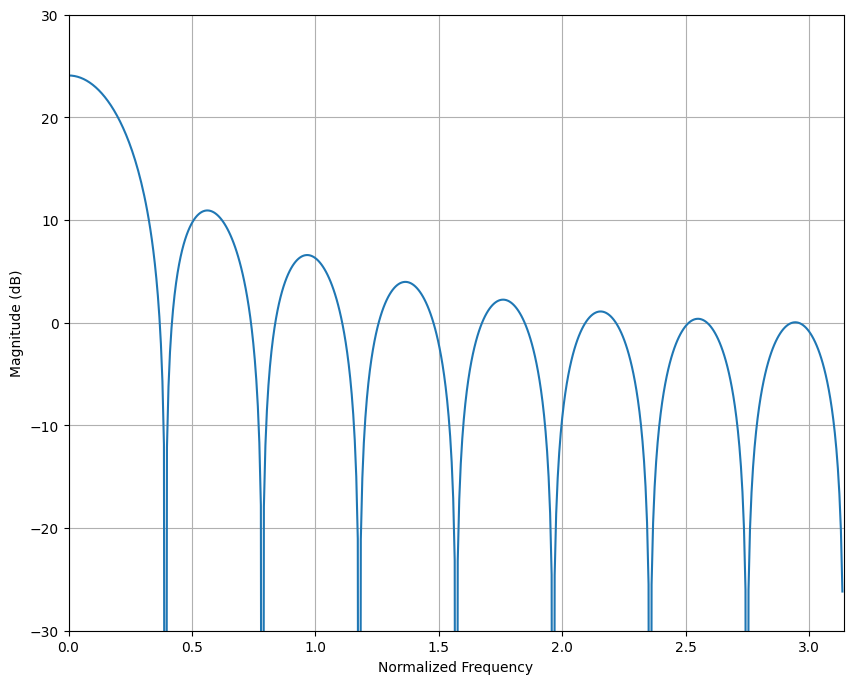

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

In [2]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512

    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)

    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

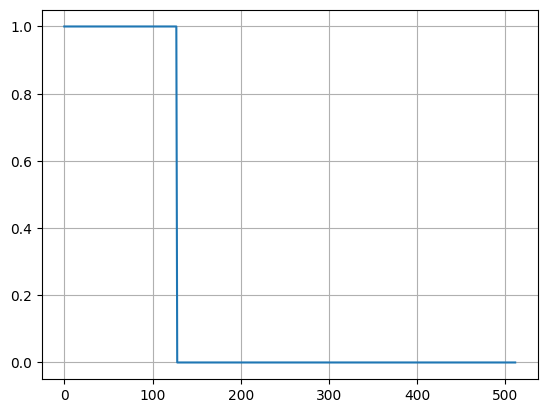

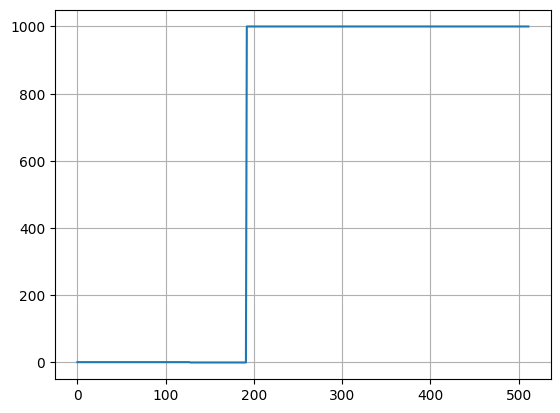

In [3]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

In [4]:
import scipy.optimize as opt

x0=np.random.rand(16) #alternative: e.g. 32
print('x0=', x0)
minout=opt.minimize(errfunc,x0)
h=minout.x
print('h=', h)

x0= [0.74146253 0.22039308 0.03104412 0.34655592 0.883285   0.47049114
 0.62614105 0.4845301  0.8463506  0.77752111 0.81007714 0.40151184
 0.60640098 0.81014015 0.15756972 0.09407047]
h= [-0.00018104 -0.00104708 -0.00348078 -0.00830034 -0.01558027 -0.02427368
 -0.03219184 -0.03690006 -0.03674801 -0.03180576 -0.02377234 -0.01514105
 -0.00797651 -0.00331535 -0.00097168 -0.00015875]


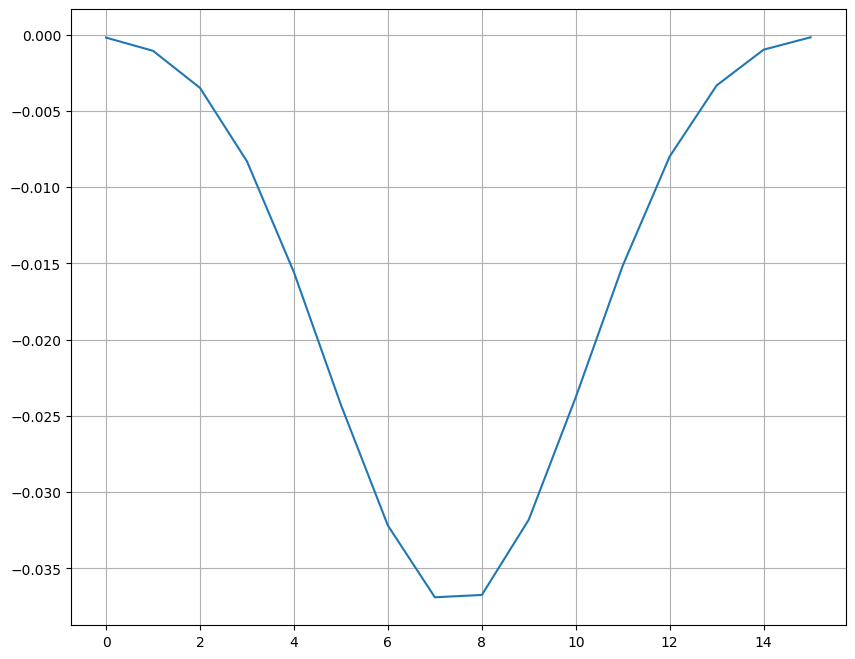

In [5]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

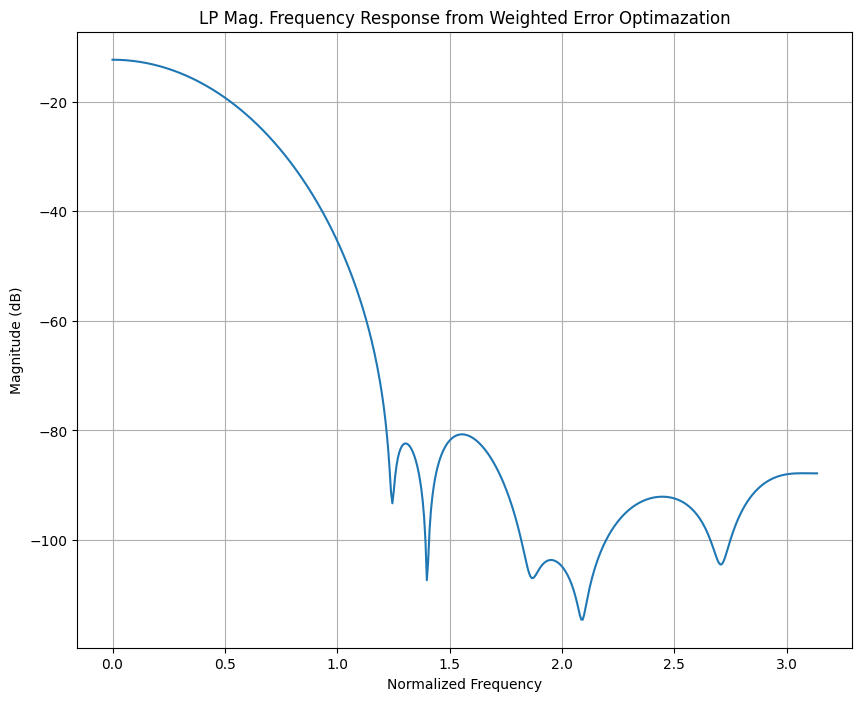

In [6]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

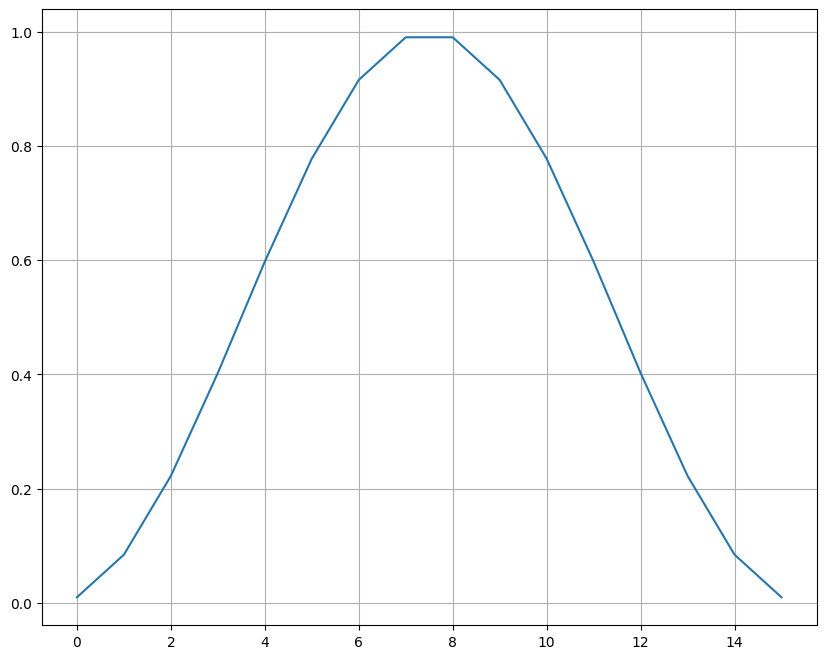

In [7]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

In [8]:
def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

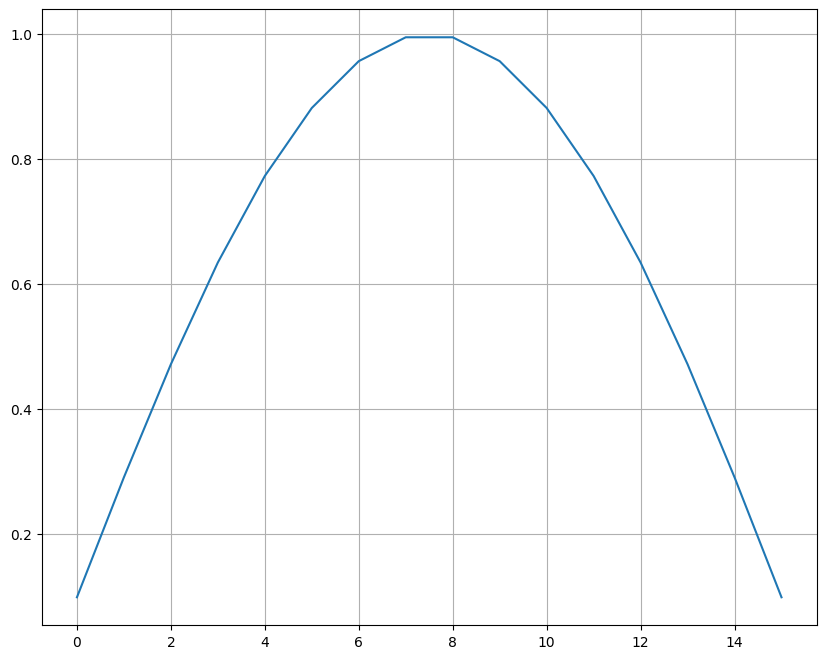

In [10]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()